In [ ]:
from tensorflow.keras.preprocessing import text
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_excel("../data/Data_Science_Jobs.xlsx")
df.head()

,job_id,job_title,company_name,country_code,posted_date,skill_name
0,15694506731727044278,Data Engineer,CGI Inc,CA,2021-06-10,"5S, Amazon Web Services (AWS), CGI, Extract-Tr..."
1,5280258259571779617,Data Scientist,SoftwareONE,RU,2020-03-01,"5S, Amazon Web Services (AWS), Extract-Transfo..."
2,2145752132554423436,Senior Data Engineer - Panorama Financial Inst...,McKinsey &amp; Company,CA,2020-02-18,"API, Amazon Web Services (AWS), Extract-Transf..."
3,5316240606115753207,Senior Production Support (DevOps) – Data Anal...,JP Morgan Chase & Co.,SG,2021-06-10,"5S, Artificial Intelligence, Amazon Web Servic..."
4,6471555744574024301,MTB Process Data Analyst Engineer,Micron Semiconductor Asia Operations Pte. Ltd,TW,2021-05-07,"3D Modeling, 5G, Artificial Intelligence, Dyna..."


In [4]:
data = df[['job_title', 'skill_name']]
data.head()

,job_title,skill_name
0,Data Engineer,"5S, Amazon Web Services (AWS), CGI, Extract-Tr..."
1,Data Scientist,"5S, Amazon Web Services (AWS), Extract-Transfo..."
2,Senior Data Engineer - Panorama Financial Inst...,"API, Amazon Web Services (AWS), Extract-Transf..."
3,Senior Production Support (DevOps) – Data Anal...,"5S, Artificial Intelligence, Amazon Web Servic..."
4,MTB Process Data Analyst Engineer,"3D Modeling, 5G, Artificial Intelligence, Dyna..."


In [5]:
def get_skill_name_trans(text):
    return ",".join([item.strip() for item in text.split(",")])

data["skill_name_trans"] = data.skill_name.apply(get_skill_name_trans)

/var/folders/p4/824j72wj45j6vl163c2r94940000gn/T/ipykernel_1865/1635177459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["skill_name_trans"] = data.skill_name.apply(get_skill_name_trans)


In [6]:
from common import transform_label_12
data["job_title_trans"] = data["job_title"].apply(transform_label_12)
data.head()

/var/folders/p4/824j72wj45j6vl163c2r94940000gn/T/ipykernel_1865/1754245670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["job_title_trans"] = data["job_title"].apply(transform_label_12)


,job_title,skill_name,skill_name_trans,job_title_trans
0,Data Engineer,"5S, Amazon Web Services (AWS), CGI, Extract-Tr...","5S,Amazon Web Services (AWS),CGI,Extract-Trans...",engineer
1,Data Scientist,"5S, Amazon Web Services (AWS), Extract-Transfo...","5S,Amazon Web Services (AWS),Extract-Transform...",scientist
2,Senior Data Engineer - Panorama Financial Inst...,"API, Amazon Web Services (AWS), Extract-Transf...","API,Amazon Web Services (AWS),Extract-Transfor...",engineer
3,Senior Production Support (DevOps) – Data Anal...,"5S, Artificial Intelligence, Amazon Web Servic...","5S,Artificial Intelligence,Amazon Web Services...",ops
4,MTB Process Data Analyst Engineer,"3D Modeling, 5G, Artificial Intelligence, Dyna...","3D Modeling,5G,Artificial Intelligence,Dynamic...",analyst


<Axes: >

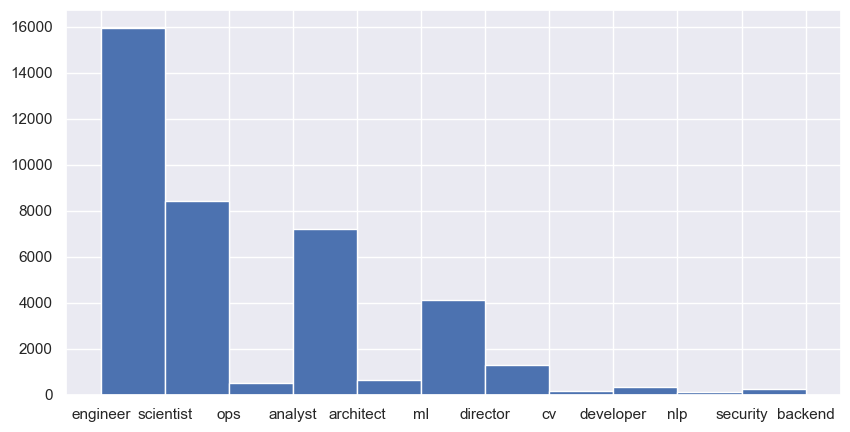

In [64]:
data["job_title_trans"].hist(figsize=(10,5), bins=range(len(data.job_title_trans.unique())))

<Axes: >

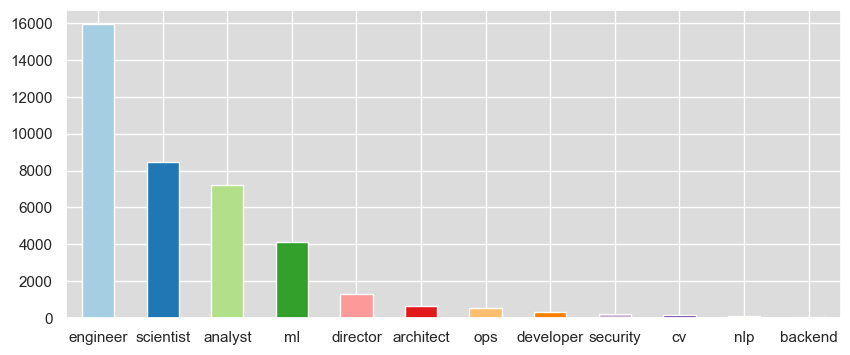

In [68]:
value_counts = data["job_title_trans"].value_counts()

#Hintergrund
plt.gca().set_facecolor('gainsboro')

value_counts.plot(kind="bar", rot=0, figsize=(10,4), xlabel="", color=plt.get_cmap("Paired").colors[:11])

In [29]:
def to_color(x):
    if "scientist" == x:
        return 0
    if "analyst" == x:
        return 1
    if "engineer" == x:
        return 2
    return 3

data["job_title_color"] = data["job_title_trans"].apply(to_color)

In [8]:
tokenizer = text.Tokenizer(num_words=1000, split=",", filters="")
tokenizer.fit_on_texts(data['skill_name_trans'].values)
bag_of_words = tokenizer.texts_to_matrix(data['skill_name_trans'].values)

In [24]:
bag_of_words.shape

(38999, 1000)

# 2D - tSNE

In [18]:
tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000, random_state=23)
new_values = tsne_model.fit_transform(bag_of_words)
np.save('../model/bow_tsne_2D.npy', new_values)

[Text(0.5, 1.0, 'T-SNE projection')]

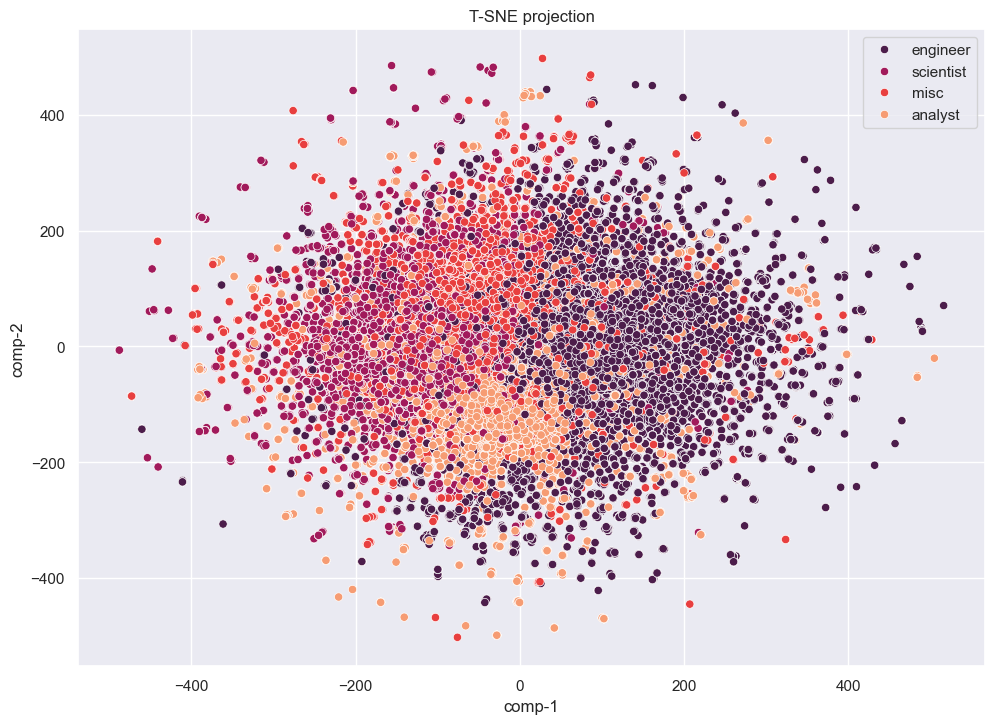

In [37]:
new_values = np.load('../model/bow_tsne_2D.npy')
df = pd.DataFrame()
df["y"] = data["job_title_color"].apply(lambda x: ["scientist", "analyst", "engineer", "misc"][x])
df["comp-1"] = new_values[:,0]
df["comp-2"] = new_values[:,1]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette="rocket",
                data=df).set(title="T-SNE projection")

# 3D - tSNE

In [26]:
tsne_model = TSNE(perplexity=10, n_components=3, init='pca', n_iter=5000, random_state=23)
new_values = tsne_model.fit_transform(bag_of_words)
np.save('../model/bow_tsne_3D.npy', new_values)

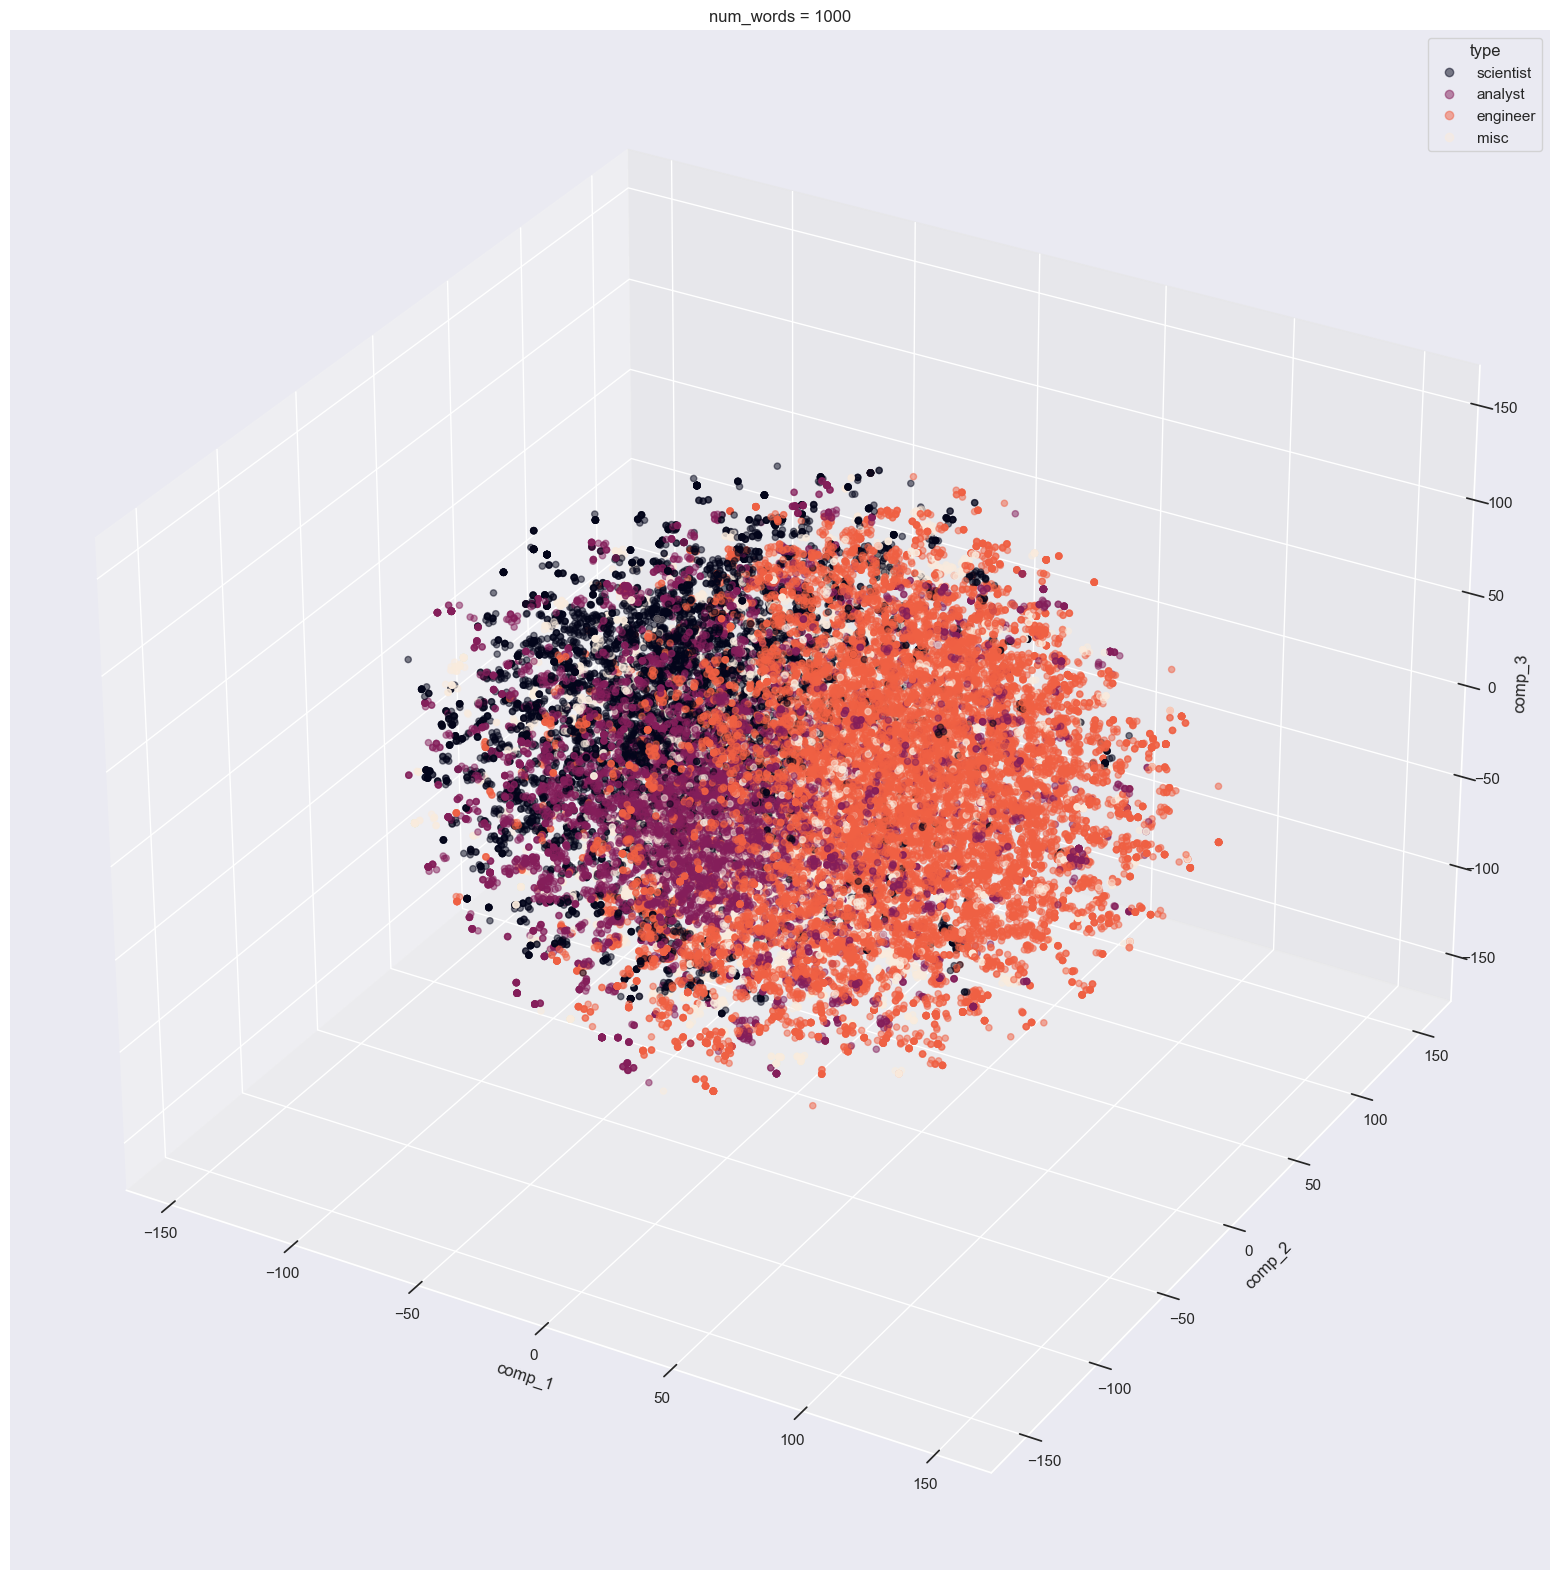

In [30]:
new_values = np.load('../model/bow_tsne_3D.npy')
labels = data["job_title_color"]
x = new_values[:,0]
y = new_values[:,1]
z = new_values[:,2]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("comp_1")
ax.set_ylabel("comp_2")
ax.set_zlabel("comp_3")

scatter = ax.scatter(x, y, z, c=labels, alpha=0.5)
ax.set_title("tSNE projections (num_words = 1000)")

ax.legend(scatter.legend_elements()[0], ["scientist", "analyst", "engineer", "misc"], title="type")
#ax.legend(*scatter.legend_elements(), title="type")
plt.show()

In [22]:
# pd.DataFrame(df.y.unique()).to_csv("../final/color_map.csv")